<a href="https://colab.research.google.com/github/etruong249/ADS-Nutrition-Label/blob/main/Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numba==0.48
!pip install aif360==0.2.2
!pip install shap

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileid = '1YNO4EZGKH895ygfXlqGVCmF6W8kmMAdy'
filename = 'cs-training.csv'
downloaded = drive.CreateFile({'id':fileid}) 
downloaded.GetContentFile(filename)
data = pd.read_csv(filename, index_col=0)

fileid2 = '1N7nVSM6eYIXIamHpass7t4bbKsNKeLh1'
filename2 = 'cs-test.csv'
downloaded2 = drive.CreateFile({'id':fileid}) 
downloaded2.GetContentFile(filename)
data_test = pd.read_csv(filename, index_col=0)

# ADS Code

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df_train = data
df_test = data_test
# df_entry = pd.read_csv('sampleEntry.csv', index_col = 0)

In [ ]:
df_train['MonthlyIncome'].replace(np.nan, 0, inplace=True)
df_test['MonthlyIncome'].replace(np.nan, 0, inplace=True)
df_train['NumberOfDependents'].replace(np.nan, 0, inplace=True)
df_test['NumberOfDependents'].replace(np.nan, 0, inplace=True)

In [ ]:
df_train[df_train.eq('male')]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
below_1 = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(df_train)
bet_1_10 = df_train[(df_train['RevolvingUtilizationOfUnsecuredLines'] > 1) &
        (df_train['RevolvingUtilizationOfUnsecuredLines'] < 10)]['RevolvingUtilizationOfUnsecuredLines'].count() * 100/len(df_train)
beyond_10 = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 10]['RevolvingUtilizationOfUnsecuredLines'].count()*100/len(df_train)

In [ ]:
to_drop_train = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index.values

In [ ]:
#df_train.drop(to_drop_train, axis = 0, inplace = True)
#df_test.drop(to_drop_test, axis = 0, inplace = True)

In [ ]:
df_train['age'].replace(0, 18, inplace=True)

In [ ]:
def plot_roc(y_valid, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')

In [ ]:
df_train.reset_index(drop = True, inplace = True)
#df_test.reset_index(drop = True, inplace = True)

In [ ]:
df_train_inputs = df_train.loc[:, df_train.columns.values[1:]]
df_test_inputs = df_test.loc[:, df_train.columns.values[1:]]
df_train_target = df_train.loc[:, df_train.columns.values[0]].to_frame()
df_tester = df_test_inputs
y_pred_tester = df_test['SeriousDlqin2yrs']
y_pred_tester

1         1
2         0
3         0
4         0
5         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(np.array(df_train_inputs), np.array(df_train_target),
                                                      test_size = 0.2, random_state = 42, stratify = np.array(df_train_target))

In [ ]:
lr = LogisticRegression(max_iter=300, solver = 'liblinear')

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=300, solver='liblinear')

In [ ]:
y_pred = lr.predict(X_valid)
y_pred_proba = lr.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: ][: , 1]

In [ ]:
y_proba_base = lr.predict_proba(np.array(df_test_inputs))
lr_baseline_model = pd.DataFrame({'Id': df_test.index.values,
                                 'Probability': y_proba_base[:, 1]})
lr_baseline_model.set_index(keys = 'Id', inplace = True)
lr_baseline_model

,Probability
Id,
1,0.183664
2,0.078822
3,0.173179
4,0.092491
5,0.014887
...,...
149996,0.029418
149997,0.075236
149998,0.033110


In [ ]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = (1 - df['prop_bad']).diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].replace([np.inf, -np.inf], np.nan).sum()
    return df

In [ ]:
def woe_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = (1 - df['prop_bad']).diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].replace([np.inf, -np.inf], np.nan).sum()
    return df

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

In [ ]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTime30-59DaysPastDueNotWorse', df_train_target)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTime30-59DaysPastDueNotWorse,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,11,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,13,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,0.000000,NaN,inf
2,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.200000,inf,0.001576
3,10,4,0.750000,0.000027,3.0,1.0,0.000007,0.000299,-3.734887,0.050000,0.287682,0.001091
4,98,264,0.541667,0.001760,143.0,121.0,0.000864,0.014263,-2.803329,0.208333,0.931558,0.037560
5,6,140,0.528571,0.000933,74.0,66.0,0.000472,0.007381,-2.750685,0.013095,0.052644,0.019005
6,7,54,0.518519,0.000360,28.0,26.0,0.000186,0.002793,-2.710383,0.010053,0.040302,0.007066
7,12,2,0.500000,0.000013,1.0,1.0,0.000007,0.000100,-2.636275,0.018519,0.074108,0.000244
8,5,342,0.450292,0.002280,154.0,188.0,0.001343,0.015360,-2.436786,0.049708,0.199489,0.034156
9,4,747,0.425703,0.004980,318.0,429.0,0.003065,0.031718,-2.336869,0.024590,0.099916,0.066958


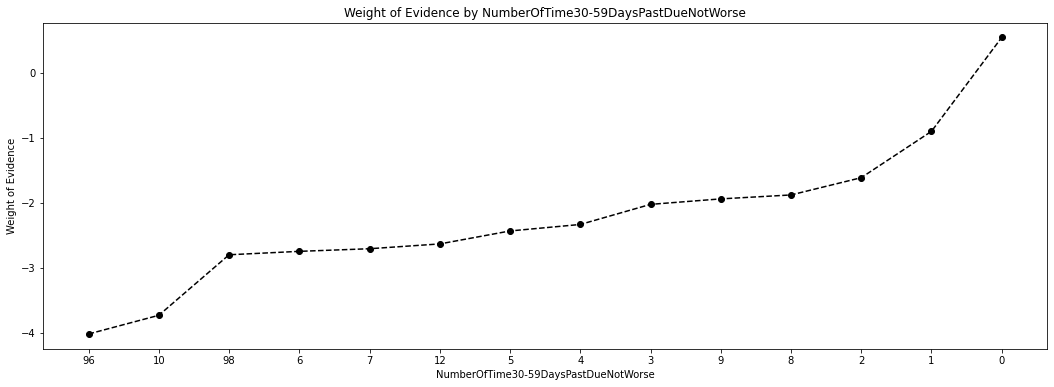

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['PastDue30-59:11-13-96-10'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([11,13,96,10]), 1, 0)
df_train_inputs['PastDue30-59:98-6-7-12'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([98,6,7,12]), 1, 0)
df_train_inputs['PastDue30-59:5-4'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)
df_train_inputs['PastDue30-59:3'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([3]), 1, 0)
df_train_inputs['PastDue30-59:9-8'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([9,8]), 1, 0)
df_train_inputs['PastDue30-59:2'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([2]), 1, 0)
df_train_inputs['PastDue30-59:1'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue30-59:0'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)

In [ ]:
df_test_inputs['PastDue30-59:11-13-96-10'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([11,13,96,10]), 1, 0)
df_test_inputs['PastDue30-59:98-6-7-12'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([98,6,7,12]), 1, 0)
df_test_inputs['PastDue30-59:5-4'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)
df_test_inputs['PastDue30-59:3'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([3]), 1, 0)
df_test_inputs['PastDue30-59:9-8'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([9,8]), 1, 0)
df_test_inputs['PastDue30-59:2'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([2]), 1, 0)
df_test_inputs['PastDue30-59:1'] = np.where(df_test_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue30-59:0'] = np.where(df_train_inputs['NumberOfTime30-59DaysPastDueNotWorse'].isin([5,4]), 1, 0)

In [ ]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTime60-89DaysPastDueNotWorse', df_train_target)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTime60-89DaysPastDueNotWorse,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,11,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.200000,inf,0.001576
2,6,16,0.750000,0.000107,12.0,4.0,0.000029,0.001197,-3.734887,0.050000,0.287682,0.004364
3,4,105,0.619048,0.000700,65.0,40.0,0.000286,0.006483,-3.121783,0.130952,0.613104,0.019347
4,5,34,0.617647,0.000227,21.0,13.0,0.000093,0.002095,-3.115848,0.001401,0.005935,0.006237
5,3,318,0.566038,0.002120,180.0,138.0,0.000986,0.017953,-2.901978,0.051609,0.213870,0.049239
6,7,9,0.555556,0.000060,5.0,4.0,0.000029,0.000499,-2.859419,0.010482,0.042560,0.001344
7,98,264,0.541667,0.001760,143.0,121.0,0.000864,0.014263,-2.803329,0.013889,0.056089,0.037560
8,2,1118,0.501789,0.007453,561.0,557.0,0.003979,0.055955,-2.643431,0.039878,0.159898,0.137393
9,8,2,0.500000,0.000013,1.0,1.0,0.000007,0.000100,-2.636275,0.001789,0.007156,0.000244


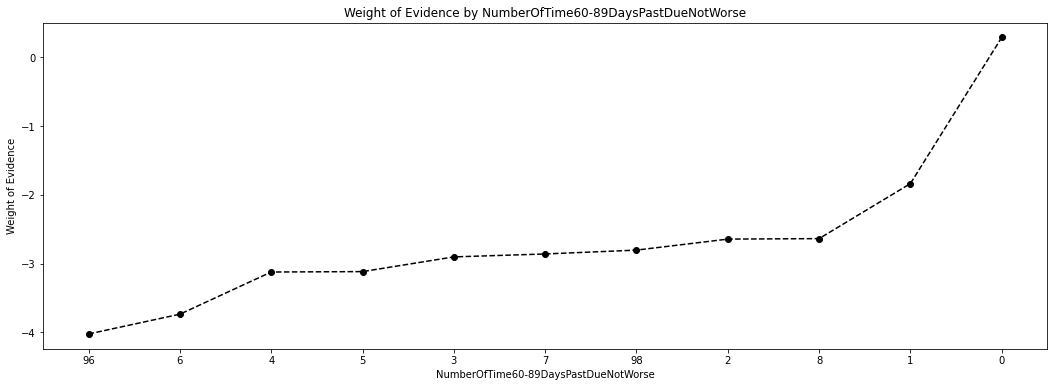

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['PastDue60-89:11-96-6-9'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([11,96,6,9]), 1, 0)
df_train_inputs['PastDue60-89:4-5'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([4,5]), 1, 0)
df_train_inputs['PastDue60-89:3-98'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([3, 98]), 1, 0)
df_train_inputs['PastDue60-89:7-8'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([7, 8]), 1, 0)
df_train_inputs['PastDue60-89:2'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([2]), 1, 0)
df_train_inputs['PastDue60-89:1'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue60-89:0'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([0]), 1, 0)

In [ ]:
df_test_inputs['PastDue60-89:11-96-6-9'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([11,96,6,9]), 1, 0)
df_test_inputs['PastDue60-89:4-5'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([4,5]), 1, 0)
df_test_inputs['PastDue60-89:3-98'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([3,98]), 1, 0)
df_test_inputs['PastDue60-89:7-8'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([7,8]), 1, 0)
df_test_inputs['PastDue60-89:2'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([2]), 1, 0)
df_test_inputs['PastDue60-89:1'] = np.where(df_test_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([1]), 1, 0)
#df_train_inputs['PastDue60-89:0'] = np.where(df_train_inputs['NumberOfTime60-89DaysPastDueNotWorse'].isin([0]), 1, 0)

In [ ]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfTimes90DaysLate', df_train_target)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberOfTimes90DaysLate,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,17,1,1.000000,0.000007,1.0,0.0,0.000000,0.000100,-inf,NaN,NaN,inf
1,7,38,0.815789,0.000253,31.0,7.0,0.000050,0.003092,-4.124352,0.184211,inf,0.012546
2,96,5,0.800000,0.000033,4.0,1.0,0.000007,0.000399,-4.022569,0.015789,0.101783,0.001576
3,9,19,0.736842,0.000127,14.0,5.0,0.000036,0.001396,-3.665894,0.063158,0.356675,0.004988
4,8,21,0.714286,0.000140,15.0,6.0,0.000043,0.001496,-3.552566,0.022556,0.113329,0.005163
5,4,291,0.670103,0.001940,195.0,96.0,0.000686,0.019449,-3.344926,0.044183,0.207639,0.062763
6,5,131,0.633588,0.000873,83.0,48.0,0.000343,0.008278,-3.183915,0.036515,0.161012,0.025266
7,10,8,0.625000,0.000053,5.0,3.0,0.000021,0.000499,-3.147101,0.008588,0.036814,0.001502
8,11,5,0.600000,0.000033,3.0,2.0,0.000014,0.000299,-3.041740,0.025000,0.105361,0.000867
9,6,80,0.600000,0.000533,48.0,32.0,0.000229,0.004788,-3.041740,0.000000,0.000000,0.013867


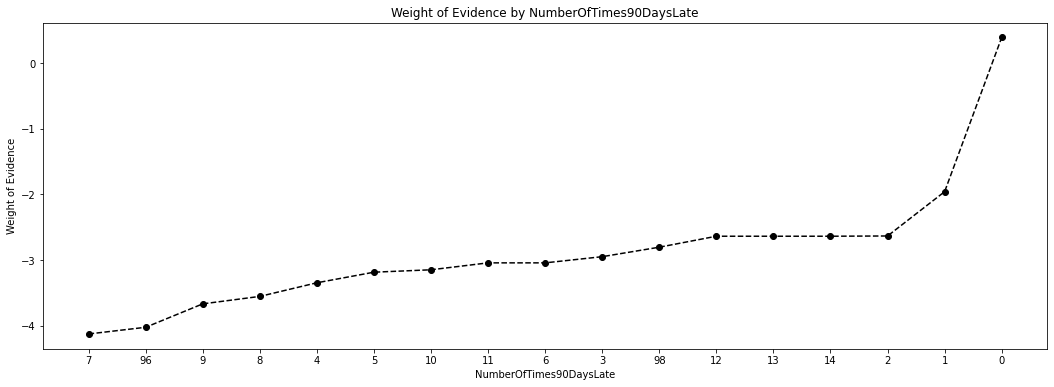

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['PastDue90:9-96-7-17-15-8'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([9,96,7,17,15,8]), 1, 0)
df_train_inputs['PastDue90:4-5'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([4,5]), 1, 0)
df_train_inputs['PastDue90:6-10-11'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([6,10,11]), 1, 0)
df_train_inputs['PastDue90:3-98'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([3,98]), 1, 0)
df_train_inputs['PastDue90:12-13-14'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([12,13,14]), 1, 0)
df_train_inputs['PastDue90:2'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([2]), 1, 0)
df_train_inputs['PastDue90:1'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([1]), 1, 0)
#df_train_inputs['PastDue90:0'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([0]), 1, 0)

In [ ]:
df_test_inputs['PastDue90:9-96-7-17-15-8'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([9,96,7,17,15,8]), 1, 0)
df_test_inputs['PastDue90:4-5'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([4,5]), 1, 0)
df_test_inputs['PastDue90:6-10-11'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([6,10,11]), 1, 0)
df_test_inputs['PastDue90:3-98'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([3,98]), 1, 0)
df_test_inputs['PastDue90:12-13-14'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([12,13,14]), 1, 0)
df_test_inputs['PastDue90:2'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([2]), 1, 0)
df_test_inputs['PastDue90:1'] = np.where(df_test_inputs['NumberOfTimes90DaysLate'].isin([1]), 1, 0)
#df_train_inputs['PastDue90:0'] = np.where(df_train_inputs['NumberOfTimes90DaysLate'].isin([0]), 1, 0)

In [ ]:
df_temp = woe_discrete(df_train_inputs, 'NumberOfDependents', df_train_target)
df_temp

,NumberOfDependents,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,6.0,158,0.151899,0.001053,24.0,134.0,0.000957,0.002394,-0.916489,NaN,NaN,0.001316
1,4.0,2862,0.103774,0.019080,297.0,2565.0,0.018325,0.029623,-0.480293,0.048125,0.436196,0.005426
2,7.0,51,0.098039,0.000340,5.0,46.0,0.000329,0.000499,-0.417071,0.005734,0.063222,0.000071
3,5.0,746,0.091153,0.004973,68.0,678.0,0.004844,0.006782,-0.336635,0.006886,0.080436,0.000653
4,3.0,9483,0.088263,0.063220,837.0,8646.0,0.061769,0.083483,-0.301247,0.002890,0.035388,0.006541
5,8.0,24,0.083333,0.000160,2.0,22.0,0.000157,0.000199,-0.238380,0.004930,0.062867,0.000010
6,2.0,19522,0.081139,0.130147,1584.0,17938.0,0.128152,0.157989,-0.209307,0.002194,0.029073,0.006245
7,1.0,26316,0.073529,0.175440,1935.0,24381.0,0.174182,0.192998,-0.102578,0.007610,0.106729,0.001930
8,0.0,90826,0.058067,0.605507,5274.0,85552.0,0.611199,0.526032,0.150060,0.015462,0.252638,0.012780
9,9.0,5,0.000000,0.000033,0.0,5.0,0.000036,0.000000,inf,0.058067,inf,inf


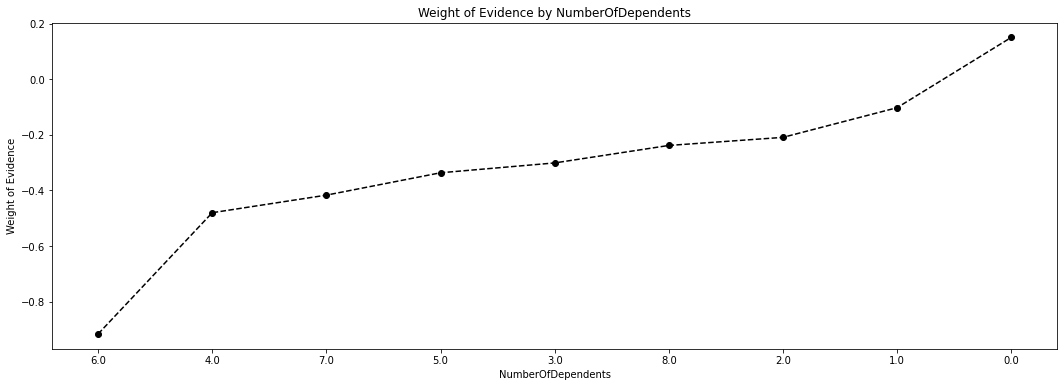

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['NumberOfDependents:>9'] = np.where(df_train_inputs['NumberOfDependents'].isin([9,10,13,20]), 1, 0)
df_train_inputs['NumberOfDependents:6'] = np.where(df_train_inputs['NumberOfDependents'].isin([6]), 1, 0)
df_train_inputs['NumberOfDependents:4'] = np.where(df_train_inputs['NumberOfDependents'].isin([4]), 1, 0)
df_train_inputs['NumberOfDependents:1'] = np.where(df_train_inputs['NumberOfDependents'].isin([1]), 1, 0)
df_train_inputs['NumberOfDependents:2'] = np.where(df_train_inputs['NumberOfDependents'].isin([2]), 1, 0)
df_train_inputs['NumberOfDependents:7'] = np.where(df_train_inputs['NumberOfDependents'].isin([7]), 1, 0)
df_train_inputs['NumberOfDependents:5'] = np.where(df_train_inputs['NumberOfDependents'].isin([5]), 1, 0)
df_train_inputs['NumberOfDependents:3'] = np.where(df_train_inputs['NumberOfDependents'].isin([3]), 1, 0)
df_train_inputs['NumberOfDependents:8'] = np.where(df_train_inputs['NumberOfDependents'].isin([8]), 1, 0)
#df_train_inputs['NumberOfDependents:0'] = np.where(df_train_inputs['NumberOfDependents'].isin([0]), 1, 0)

In [ ]:
df_test_inputs['NumberOfDependents:>9'] = np.where(df_test_inputs['NumberOfDependents'].isin([9,10,13,20]), 1, 0)
df_test_inputs['NumberOfDependents:6'] = np.where(df_test_inputs['NumberOfDependents'].isin([6]), 1, 0)
df_test_inputs['NumberOfDependents:4'] = np.where(df_test_inputs['NumberOfDependents'].isin([4]), 1, 0)
df_test_inputs['NumberOfDependents:1'] = np.where(df_test_inputs['NumberOfDependents'].isin([1]), 1, 0)
df_test_inputs['NumberOfDependents:2'] = np.where(df_test_inputs['NumberOfDependents'].isin([2]), 1, 0)
df_test_inputs['NumberOfDependents:7'] = np.where(df_test_inputs['NumberOfDependents'].isin([7]), 1, 0)
df_test_inputs['NumberOfDependents:5'] = np.where(df_test_inputs['NumberOfDependents'].isin([5]), 1, 0)
df_test_inputs['NumberOfDependents:3'] = np.where(df_test_inputs['NumberOfDependents'].isin([3]), 1, 0)
df_test_inputs['NumberOfDependents:8'] = np.where(df_test_inputs['NumberOfDependents'].isin([8]), 1, 0)
#df_train_inputs['NumberOfDependents:0'] = np.where(df_train_inputs['NumberOfDependents'].isin([0]), 1, 0)

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 1000)])
bins3 = pd.IntervalIndex.from_tuples([(10000, 12000), (12000, 14000), (14000, 16000), (16000, 20000)])
bins4 = pd.IntervalIndex.from_tuples([(20000, 30000), (30000, 50000)])
box1 = pd.cut(df_train[df_train['MonthlyIncome'] <= 1000]['MonthlyIncome'], bins)
box2 = pd.qcut(df_train[(df_train['MonthlyIncome'] > 1000) & 
                         (df_train['MonthlyIncome'] <= 10000)]['MonthlyIncome'], 4)
box3 = pd.cut(df_train[(df_train['MonthlyIncome'] > 10000) & 
                         (df_train['MonthlyIncome'] <= 20000)]['MonthlyIncome'], bins3)
box4 = pd.cut(df_train[(df_train['MonthlyIncome'] > 20000) & 
                         (df_train['MonthlyIncome'] <= 50000)]['MonthlyIncome'], bins4)

In [ ]:
bins5 = pd.IntervalIndex.from_tuples([(50000, 70000), (70000,100000), (100000, 140000), (140000, 200000), (200000, 500000),
                                     (500000, 3500000)])
box5 = pd.cut(df_train[df_train['MonthlyIncome'] > 50000]['MonthlyIncome'], bins5)

In [ ]:
df_train_inputs['MonthlyIncome_x'] = df_train_inputs['MonthlyIncome'].values

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'MonthlyIncome_x', df_train_target)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MonthlyIncome_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,31365,0.055316,0.209100,1735.0,29630.0,0.211682,0.173050,0.201505,NaN,NaN,0.007785
1,1.0,605,0.028099,0.004033,17.0,588.0,0.004201,0.001696,0.907239,0.027217,0.705734,0.002273
2,2.0,6,0.000000,0.000040,0.0,6.0,0.000043,0.000000,inf,0.028099,inf,inf
3,4.0,2,0.500000,0.000013,1.0,1.0,0.000007,0.000100,-2.636275,0.500000,inf,0.000244
4,5.0,2,0.000000,0.000013,0.0,2.0,0.000014,0.000000,inf,0.500000,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
13589,835040.0,1,0.000000,0.000007,0.0,1.0,0.000007,0.000000,inf,0.000000,NaN,inf
13590,1072500.0,1,0.000000,0.000007,0.0,1.0,0.000007,0.000000,inf,0.000000,NaN,inf
13591,1560100.0,1,0.000000,0.000007,0.0,1.0,0.000007,0.000000,inf,0.000000,NaN,inf
13592,1794060.0,1,0.000000,0.000007,0.0,1.0,0.000007,0.000000,inf,0.000000,NaN,inf


In [ ]:
df_train_inputs['MonthlyIncome:0-200'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(0, 200)), 1, 0)
df_train_inputs['MonthlyIncome:200-1000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(200, 1000)), 1, 0)
df_train_inputs['MonthlyIncome:1000-3500'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(1000, 3500)), 1, 0)
df_train_inputs['MonthlyIncome:3500-5000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(3500, 5000)), 1, 0)
#df_train_inputs['MonthlyIncome:5000-6850'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(5000, 6850)), 1, 0)
df_train_inputs['MonthlyIncome:6850-10000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(6850, 10000)), 1, 0)
df_train_inputs['MonthlyIncome:10000-12000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(10000, 12000)), 1, 0)
df_train_inputs['MonthlyIncome:12000-16000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(12000, 16000)), 1, 0)
df_train_inputs['MonthlyIncome:16000-30000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(16000, 30000)), 1, 0)
df_train_inputs['MonthlyIncome:30000-70000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(30000, 70000)), 1, 0)
df_train_inputs['MonthlyIncome:70000-100000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(70000, 100000)), 1, 0)
df_train_inputs['MonthlyIncome:100000-140000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(100000, 140000)), 1, 0)
df_train_inputs['MonthlyIncome:140000-500000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(140000, 500000)), 1, 0)
df_train_inputs['MonthlyIncome:>500000'] = np.where(df_train_inputs['MonthlyIncome'].isin(range(500000, int(df_train_inputs['MonthlyIncome'].max()))), 1, 0)

In [ ]:
df_test_inputs['MonthlyIncome:0-200'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(0, 200)), 1, 0)
df_test_inputs['MonthlyIncome:200-1000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(200, 1000)), 1, 0)
df_test_inputs['MonthlyIncome:1000-3500'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(1000, 3500)), 1, 0)
df_test_inputs['MonthlyIncome:3500-5000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(3500, 5000)), 1, 0)
#df_test_inputs['MonthlyIncome:5000-6850'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(5000, 6850)), 1, 0)
df_test_inputs['MonthlyIncome:6850-10000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(6850, 10000)), 1, 0)
df_test_inputs['MonthlyIncome:10000-12000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(10000, 12000)), 1, 0)
df_test_inputs['MonthlyIncome:12000-16000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(12000, 16000)), 1, 0)
df_test_inputs['MonthlyIncome:16000-30000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(16000, 30000)), 1, 0)
df_test_inputs['MonthlyIncome:30000-70000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(30000, 70000)), 1, 0)
df_test_inputs['MonthlyIncome:70000-100000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(70000, 100000)), 1, 0)
df_test_inputs['MonthlyIncome:100000-140000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(100000, 140000)), 1, 0)
df_test_inputs['MonthlyIncome:140000-500000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(140000, 500000)), 1, 0)
df_test_inputs['MonthlyIncome:>500000'] = np.where(df_test_inputs['MonthlyIncome'].isin(range(500000, int(df_test_inputs['MonthlyIncome'].max()))), 1, 0)

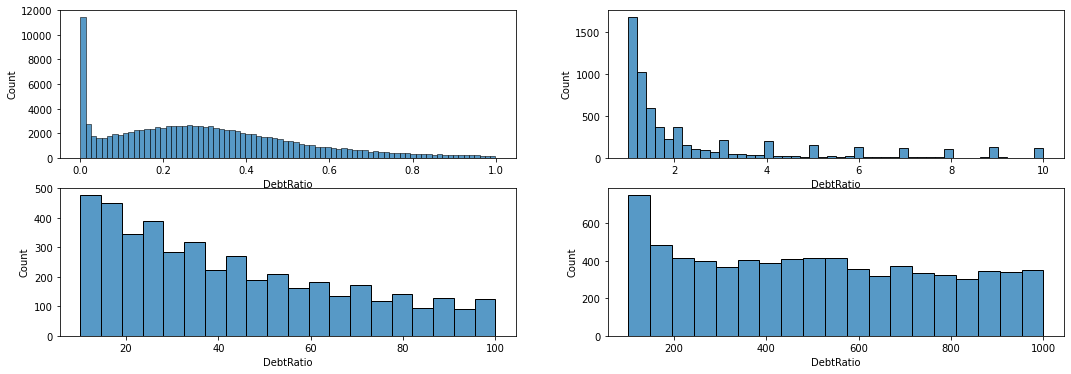

In [ ]:
#Train_Dataset Boxplot
fig, axes = plt.subplots(2, 2, figsize=(18,6))
sns.histplot(x = df_train[df_train['DebtRatio'] < 1]['DebtRatio'],
            ax = axes[0,0])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 1) & 
                        (df_train['DebtRatio'] <= 10)]['DebtRatio'],
            ax = axes[0,1])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 10) & 
                        (df_train['DebtRatio'] <= 100)]['DebtRatio'],
            ax = axes[1,0])
sns.histplot(x = df_train[(df_train['DebtRatio'] > 100) & 
                        (df_train['DebtRatio'] <= 1000)]['DebtRatio'],
            ax = axes[1,1])

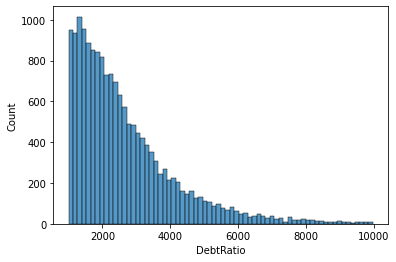

In [ ]:
sns.histplot(x = df_train[(df_train['DebtRatio'] > 1000) & 
                        (df_train['DebtRatio'] <= 10000)]['DebtRatio'])

In [ ]:
bins = pd.IntervalIndex.from_tuples([(1, 10), (10, 100), (100, 1000), (1000, int(df_train_inputs['DebtRatio'].max()))])
box1 = pd.qcut(df_train[df_train['DebtRatio'] <= 1]['DebtRatio'], 10)
box2 = pd.cut(df_train[df_train['DebtRatio'] > 1]['DebtRatio'], bins)

In [ ]:
df_train_inputs['DebtRatio_x'] = df_train_inputs['DebtRatio'].values

In [ ]:
df_train_inputs.loc[box1.index.values, 'DebtRatio_x'] = box1.values
df_train_inputs.loc[box2.index.values, 'DebtRatio_x'] = box2.values

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'DebtRatio_x', df_train_target)
df_temp

,DebtRatio_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.001, 0.0129]",11487,0.051972,0.076580,597.0,10890.0,0.077800,0.059545,0.267408,NaN,NaN,4.881530e-03
1,"(0.0129, 0.0897]",11486,0.067038,0.076573,770.0,10716.0,0.076557,0.076800,-0.003172,0.015066,0.270580,7.716332e-07
2,"(0.0897, 0.159]",11486,0.064078,0.076573,736.0,10750.0,0.076800,0.073409,0.045156,0.002960,0.048328,1.531166e-04
3,"(0.159, 0.218]",11486,0.059812,0.076573,687.0,10799.0,0.077150,0.068522,0.118600,0.004266,0.073444,1.023301e-03
4,"(0.218, 0.275]",11487,0.052929,0.076580,608.0,10879.0,0.077722,0.060642,0.248140,0.006883,0.129540,4.238040e-03
5,"(0.275, 0.333]",11486,0.053979,0.076573,620.0,10866.0,0.077629,0.061839,0.227399,0.001049,0.020740,3.590521e-03
6,"(0.333, 0.399]",11486,0.062250,0.076573,715.0,10771.0,0.076950,0.071315,0.076055,0.008271,0.151344,4.286027e-04
7,"(0.399, 0.483]",11486,0.069563,0.076573,799.0,10687.0,0.076350,0.079693,-0.042853,0.007313,0.118908,1.432521e-04
8,"(0.483, 0.621]",11486,0.086018,0.076573,988.0,10498.0,0.075000,0.098544,-0.273018,0.016455,0.230165,6.427966e-03
9,"(0.621, 1.0]",11487,0.105772,0.076580,1215.0,10272.0,0.073385,0.121185,-0.501597,0.019754,0.228580,2.397628e-02


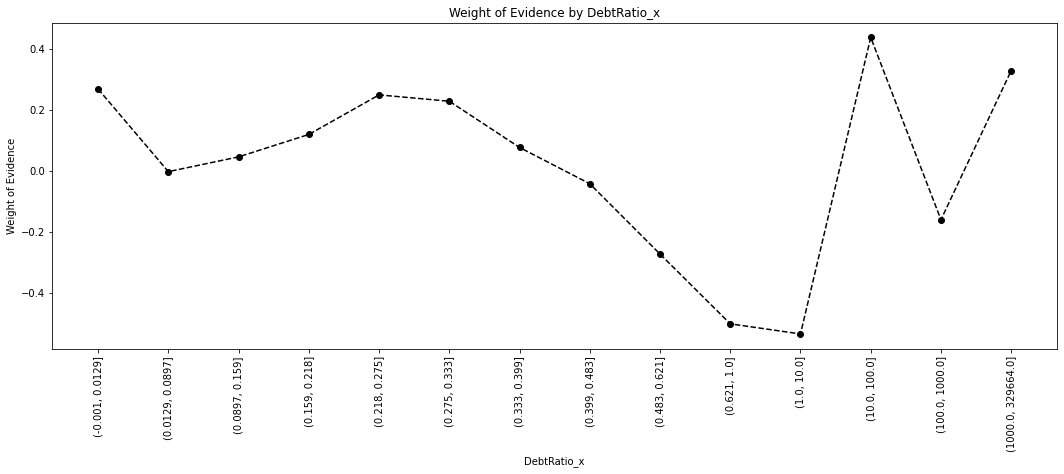

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_train_inputs['DebtRatio:<0.0129'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.0, 0.0129, 0.001)), 1, 0)
#df_train_inputs['DebtRatio:<0.159'] = np.where(round(df_train_inputs['DebtRatio'], 4).isin(np.arange(0.0129, 0.159, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.218'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.159, 0.218, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.333'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.218, 0.333, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.483'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.333, 0.483, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<0.621'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.483, 0.621, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<1'] = np.where(round(df_train_inputs['DebtRatio'], 3).isin(np.arange(0.621, 1, 0.001)), 1, 0)
df_train_inputs['DebtRatio:<10'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(1, 10)), 1, 0)
df_train_inputs['DebtRatio:<100'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(10, 100)), 1, 0)
df_train_inputs['DebtRatio:<1000'] = np.where(round(df_train_inputs['DebtRatio'], 0).isin(range(100, 1000)), 1, 0)
df_train_inputs['DebtRatio:>1000'] = np.where((df_train_inputs['DebtRatio'] > 1000), 1, 0)

In [ ]:
df_test_inputs['DebtRatio:<0.0129'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.0, 0.0129, 0.001)), 1, 0)
#df_test_inputs['DebtRatio:<0.159'] = np.where(round(df_test_inputs['DebtRatio'], 4).isin(np.arange(0.0129, 0.159, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.218'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.159, 0.218, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.333'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.218, 0.333, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.483'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.333, 0.483, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<0.621'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.483, 0.621, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<1'] = np.where(round(df_test_inputs['DebtRatio'], 3).isin(np.arange(0.621, 1, 0.001)), 1, 0)
df_test_inputs['DebtRatio:<10'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(1, 10)), 1, 0)
df_test_inputs['DebtRatio:<100'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(10, 100)), 1, 0)
df_test_inputs['DebtRatio:<1000'] = np.where(round(df_test_inputs['DebtRatio'], 0).isin(range(100, 1000)), 1, 0)
df_test_inputs['DebtRatio:>1000'] = np.where((df_test_inputs['DebtRatio'] > 1000), 1, 0)

In [ ]:
#bins = pd.IntervalIndex.from_tuples([(1, 10), (10, 100), (100, 1000), (1000, int(df_train_inputs['RevolvingUtilizationOfUnsecuredLines'].max()))])
box1 = pd.cut(df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] <= 1]['RevolvingUtilizationOfUnsecuredLines'], 50)
box2 = pd.cut(df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] > 1]['RevolvingUtilizationOfUnsecuredLines'], 10)

In [ ]:
df_train_inputs['RevolvingUtilizationOfUnsecuredLines_x'] = df_train_inputs['RevolvingUtilizationOfUnsecuredLines'].values

In [ ]:
df_train_inputs.loc[box1.index.values, 'RevolvingUtilizationOfUnsecuredLines_x'] = box1.values
df_train_inputs.loc[box2.index.values, 'RevolvingUtilizationOfUnsecuredLines_x'] = box2.values

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'RevolvingUtilizationOfUnsecuredLines_x', df_train_target)
df_temp

,RevolvingUtilizationOfUnsecuredLines_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-49.707, 5071.7]",3274,0.377214,0.021827,1235.0,2039.0,0.014567,0.123180,-2.134886,NaN,NaN,2.318759e-01
1,"(-0.001, 0.02]",30655,0.019149,0.204367,587.0,30068.0,0.214811,0.058548,1.299917,0.358066,3.434803,2.031296e-01
2,"(0.02, 0.04]",12516,0.013902,0.083440,174.0,12342.0,0.088174,0.017355,1.625433,0.005246,0.325516,1.151110e-01
3,"(0.04, 0.06]",9150,0.016831,0.061000,154.0,8996.0,0.064269,0.015360,1.431308,0.002928,0.194125,7.000385e-02
4,"(0.06, 0.08]",6748,0.022525,0.044987,152.0,6596.0,0.047123,0.015161,1.134063,0.005695,0.297245,3.624744e-02
5,"(0.08, 0.1]",5335,0.018557,0.035567,99.0,5236.0,0.037407,0.009874,1.331918,0.003968,0.197855,3.667120e-02
6,"(0.1, 0.12]",4385,0.022349,0.029233,98.0,4287.0,0.030627,0.009775,1.142100,0.003792,0.189818,2.381568e-02
7,"(0.12, 0.14]",3770,0.025199,0.025133,95.0,3675.0,0.026255,0.009475,1.019157,0.002850,0.122943,1.710095e-02
8,"(0.14, 0.16]",3385,0.032496,0.022567,110.0,3275.0,0.023397,0.010971,0.757318,0.007297,0.261839,9.410225e-03
9,"(0.16, 0.18]",3046,0.030532,0.020307,93.0,2953.0,0.021097,0.009276,0.821702,0.001964,0.064385,9.713256e-03


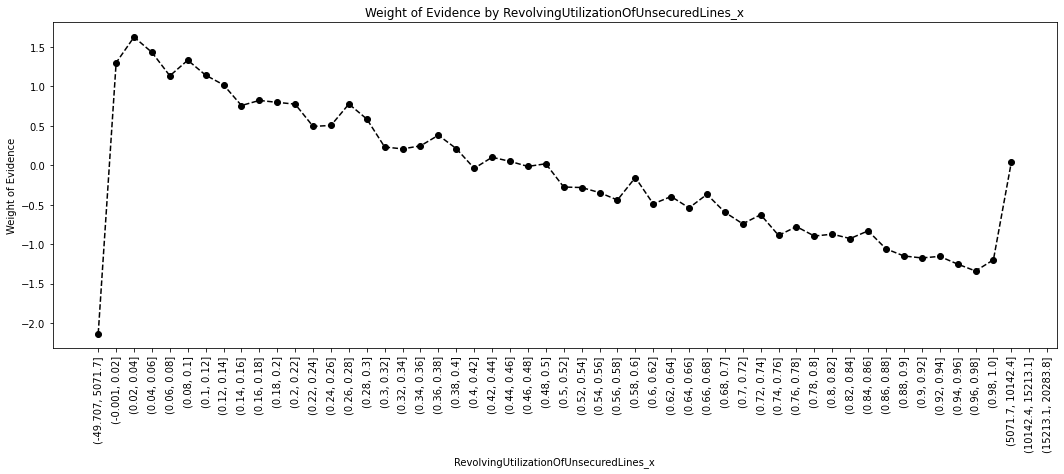

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:<0.0004'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.0004), 1, 0)
#df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] >= 0.0004) & (train['RevolvingUtilizationOfUnsecuredLines'] < 0.05) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.05-0.1'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.05) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.1) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.1-0.2'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.1) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.2) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.2-0.3'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.2) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.3) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.3-0.4'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.4) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.4-0.6'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.4) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.6) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.6-0.8'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.8) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.8-1.0'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.8) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 1.0) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:1-10'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 1) & (df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 10) , 1, 0)
df_train_inputs['RevolvingUtilizationOfUnsecuredLines:>10'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] > 10) , 1, 0)

In [ ]:
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:<0.0004'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.0004), 1, 0)
#df_train_inputs['RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF'] = np.where((df_train_inputs['RevolvingUtilizationOfUnsecuredLines'] >= 0.0004) & (train['RevolvingUtilizationOfUnsecuredLines'] < 0.05) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.05-0.1'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.05) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] < 0.1) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.1-0.2'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.1) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.2) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.2-0.3'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.2) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.3) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.3-0.4'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.3) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.4) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.4-0.6'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.4) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.6) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.6-0.8'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.6) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 0.8) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:0.8-1.0'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 0.8) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 1.0) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:1-10'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 1) & (df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] <= 10) , 1, 0)
df_test_inputs['RevolvingUtilizationOfUnsecuredLines:>10'] = np.where((df_test_inputs['RevolvingUtilizationOfUnsecuredLines'] > 10) , 1, 0)

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'NumberOfOpenCreditLinesAndLoans', df_train_target)
df_temp

,NumberOfOpenCreditLinesAndLoans,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1888,0.256356,0.012587,484.0,1404.0,0.010030,0.048274,-1.571279,NaN,NaN,6.009209e-02
1,1,4438,0.131816,0.029587,585.0,3853.0,0.027527,0.058348,-0.751279,0.124540,0.820000,2.315575e-02
2,2,6666,0.091359,0.044440,609.0,6057.0,0.043272,0.060742,-0.339123,0.040457,0.412156,5.924399e-03
3,3,9058,0.075293,0.060387,682.0,8376.0,0.059840,0.068023,-0.128179,0.016067,0.210944,1.048946e-03
4,4,11609,0.064002,0.077393,743.0,10866.0,0.077629,0.074107,0.046423,0.011290,0.174602,1.634728e-04
5,5,12931,0.063336,0.086207,819.0,12112.0,0.086530,0.081688,0.057593,0.000666,0.011170,2.789077e-04
6,6,13614,0.055384,0.090760,754.0,12860.0,0.091874,0.075204,0.200210,0.007952,0.142617,3.337442e-03
7,7,13245,0.056399,0.088300,747.0,12498.0,0.089288,0.074506,0.180984,0.001014,0.019226,2.675252e-03
8,8,12562,0.048241,0.083747,606.0,11956.0,0.085416,0.060443,0.345834,0.008158,0.164850,8.636507e-03
9,9,11355,0.058476,0.075700,664.0,10691.0,0.076378,0.066228,0.142600,0.010236,0.203233,1.447489e-03


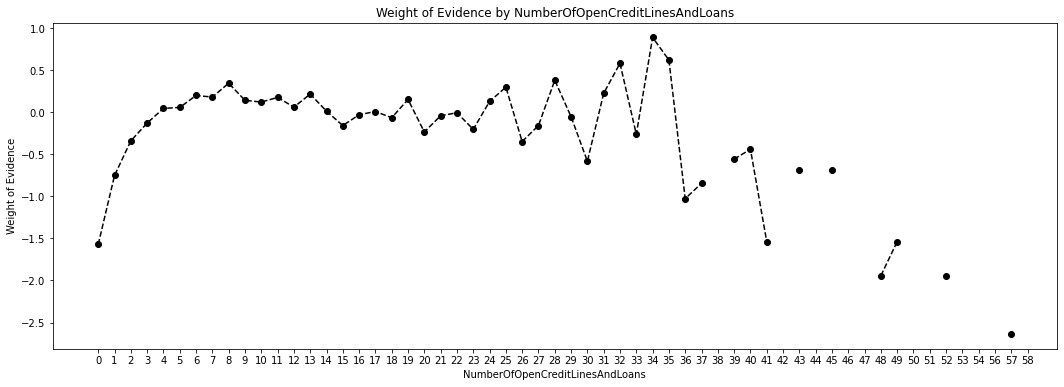

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['NumberOfOpenCreditLinesAndLoans:0'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([0]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:1'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([1]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:2'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([2]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:3'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([3]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:4-6'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(4, 6)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:6-8'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(6, 8)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:9-13'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(9, 13)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:13'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([13]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:14-18'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(14, 18)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:19'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin([19]), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:20-24'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(20, 24)), 1, 0)
df_train_inputs['NumberOfOpenCreditLinesAndLoans:24-26'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(24, 27)), 1, 0)
#df_train_inputs['NumberOfOpenCreditLinesAndLoans:>26_REF'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(27, int(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].max()))), 1, 0)

In [ ]:
df_test_inputs['NumberOfOpenCreditLinesAndLoans:0'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([0]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:1'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([1]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:2'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([2]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:3'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([3]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:4-6'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(4, 6)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:6-8'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(6, 8)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:9-13'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(9, 13)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:13'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([13]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:14-18'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(14, 18)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:19'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin([19]), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:20-24'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(20, 24)), 1, 0)
df_test_inputs['NumberOfOpenCreditLinesAndLoans:24-26'] = np.where(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(24, 27)), 1, 0)
#df_train_inputs['NumberOfOpenCreditLinesAndLoans:>26_REF'] = np.where(df_train_inputs['NumberOfOpenCreditLinesAndLoans'].isin(range(27, int(df_test_inputs['NumberOfOpenCreditLinesAndLoans'].max()))), 1, 0)

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'NumberRealEstateLoansOrLines', df_train_target)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NumberRealEstateLoansOrLines,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,56188,0.083149,0.374587,4672.0,51516.0,0.368040,0.465988,-0.235970,NaN,NaN,2.311292e-02
1,1,52338,0.052505,0.348920,2748.0,49590.0,0.354280,0.274087,0.256641,0.030645,4.926106e-01,2.058072e-02
2,2,31522,0.055993,0.210147,1765.0,29757.0,0.212589,0.176042,0.188639,0.003488,6.800212e-02,6.894216e-03
3,3,6300,0.066984,0.042000,422.0,5878.0,0.041994,0.042091,-0.002308,0.010991,1.909472e-01,2.240374e-07
4,4,2170,0.089401,0.014467,194.0,1976.0,0.014117,0.019350,-0.315303,0.022417,3.129948e-01,1.649914e-03
5,5,689,0.120464,0.004593,83.0,606.0,0.004329,0.008278,-0.648236,0.031064,3.329323e-01,2.559948e-03
6,6,320,0.150000,0.002133,48.0,272.0,0.001943,0.004788,-0.901674,0.029536,2.534383e-01,2.564662e-03
7,7,171,0.181287,0.001140,31.0,140.0,0.001000,0.003092,-1.128620,0.031287,2.269458e-01,2.360819e-03
8,8,93,0.247312,0.000620,23.0,70.0,0.000500,0.002294,-1.523274,0.066025,3.946542e-01,2.732666e-03
9,9,78,0.179487,0.000520,14.0,64.0,0.000457,0.001396,-1.116449,0.067825,4.068247e-01,1.048504e-03


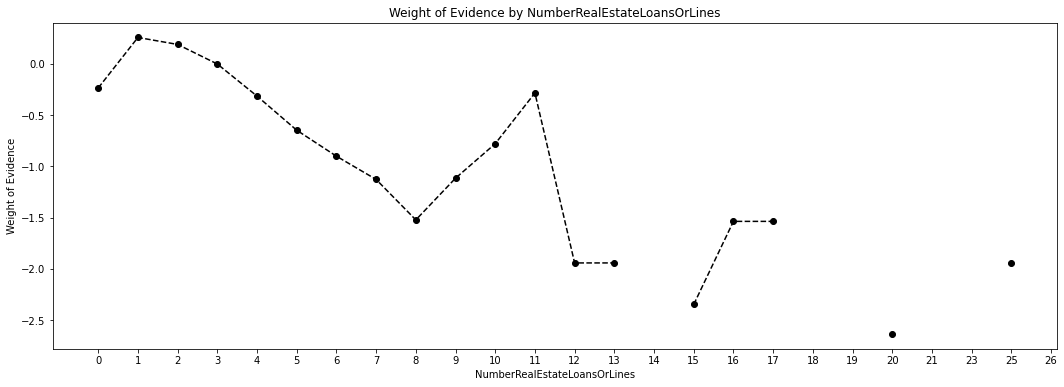

In [ ]:
plot_by_woe(df_temp)

In [ ]:
df_train_inputs['NumberRealEstateLoansOrLines:0'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([0]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:1'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([1]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:2'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([2]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:3'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([3]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:4'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([4]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:5'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([5]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:6'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([6]), 1, 0)
df_train_inputs['NumberRealEstateLoansOrLines:7'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin([7]), 1, 0)
#df_train_inputs['NumberRealEstateLoansOrLines:>7_REF'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin(range(8, int(df_train_inputs['NumberRealEstateLoansOrLines'].max()))), 1, 0)

In [ ]:
df_test_inputs['NumberRealEstateLoansOrLines:0'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([0]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:1'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([1]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:2'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([2]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:3'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([3]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:4'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([4]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:5'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([5]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:6'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([6]), 1, 0)
df_test_inputs['NumberRealEstateLoansOrLines:7'] = np.where(df_test_inputs['NumberRealEstateLoansOrLines'].isin([7]), 1, 0)
#df_train_inputs['NumberRealEstateLoansOrLines:>7_REF'] = np.where(df_train_inputs['NumberRealEstateLoansOrLines'].isin(range(8, int(df_test_inputs['NumberRealEstateLoansOrLines'].max()))), 1, 0)

In [ ]:
#fine classing age feature into 30 categories
bins=np.linspace(df_train_inputs['age'].min(), df_train_inputs['age'].max()+1, 30)
df_train_inputs['age_x'] = pd.cut(df_train_inputs['age'], bins=bins, include_lowest=True, precision=0)

In [ ]:
df_temp = woe_continuous(df_train_inputs, 'age_x', df_train_target)
df_temp

,age_x,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(17.0, 21.0]",184,0.070652,0.001227,13.0,171.0,0.001222,0.001297,-0.059561,NaN,NaN,0.000004
1,"(21.0, 24.0]",1891,0.107879,0.012607,204.0,1687.0,0.012052,0.020347,-0.523688,0.037227,0.464127,0.004344
2,"(24.0, 28.0]",3484,0.124569,0.023227,434.0,3050.0,0.021790,0.043287,-0.686423,0.016690,0.162735,0.014757
3,"(28.0, 31.0]",5199,0.114060,0.034660,593.0,4606.0,0.032906,0.059146,-0.586354,0.010509,0.100068,0.015386
4,"(31.0, 34.0]",6327,0.110005,0.042180,696.0,5631.0,0.040229,0.069420,-0.545582,0.004056,0.040772,0.015926
5,"(34.0, 37.0]",9301,0.098377,0.062007,915.0,8386.0,0.059911,0.091263,-0.420880,0.011628,0.124702,0.013195
6,"(37.0, 40.0]",8711,0.089427,0.058073,779.0,7932.0,0.056668,0.077698,-0.315626,0.008949,0.105255,0.006638
7,"(40.0, 43.0]",9412,0.091266,0.062747,859.0,8553.0,0.061104,0.085677,-0.338007,0.001839,0.022381,0.008306
8,"(43.0, 47.0]",10510,0.080875,0.070067,850.0,9660.0,0.069013,0.084780,-0.205762,0.010391,0.132244,0.003244
9,"(47.0, 50.0]",11362,0.079651,0.075747,905.0,10457.0,0.074707,0.090265,-0.189183,0.001224,0.016579,0.002943


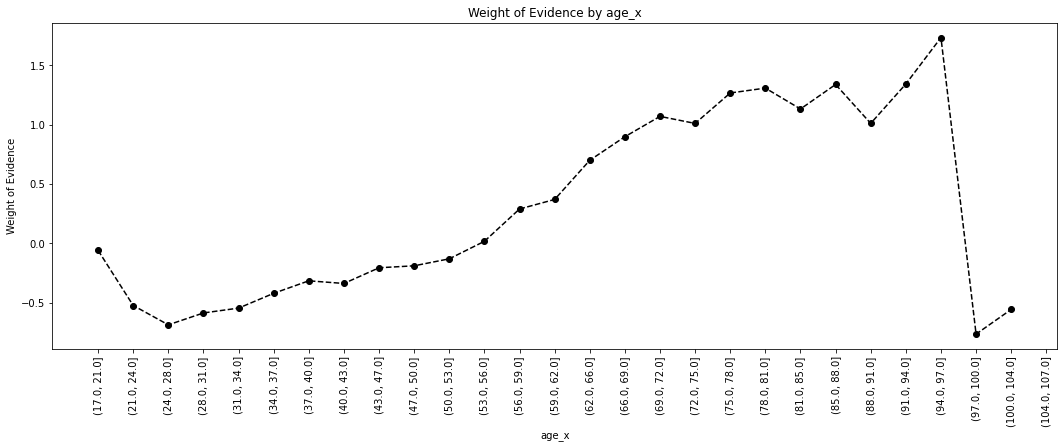

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
df_train_inputs['age:<24'] = np.where(df_train_inputs['age'].isin(range(24)), 1, 0)
df_train_inputs['age:24-33'] = np.where(df_train_inputs['age'].isin(range(24, 33)), 1, 0)
df_train_inputs['age:33-36'] = np.where(df_train_inputs['age'].isin(range(33, 36)), 1, 0)
df_train_inputs['age:36-42'] = np.where(df_train_inputs['age'].isin(range(36, 42)), 1, 0)
df_train_inputs['age:42-55'] = np.where(df_train_inputs['age'].isin(range(42, 55)), 1, 0)
df_train_inputs['age:55-58'] = np.where(df_train_inputs['age'].isin(range(55, 58)), 1, 0)
df_train_inputs['age:58-64'] = np.where(df_train_inputs['age'].isin(range(58, 64)), 1, 0)
df_train_inputs['age:64-67'] = np.where(df_train_inputs['age'].isin(range(64, 67)), 1, 0)
df_train_inputs['age:67-70'] = np.where(df_train_inputs['age'].isin(range(67, 70)), 1, 0)
df_train_inputs['age:70-73'] = np.where(df_train_inputs['age'].isin(range(70, 73)), 1, 0)
df_train_inputs['age:73-89'] = np.where(df_train_inputs['age'].isin(range(73, 89)), 1, 0)
#df_train_inputs['age:>89_REF'] = np.where(df_test_inputs['age'].isin(range(89, int(df_train_inputs['age'].max()))), 1, 0)

In [ ]:
df_test_inputs['age:<24'] = np.where(df_test_inputs['age'].isin(range(24)), 1, 0)
df_test_inputs['age:24-33'] = np.where(df_test_inputs['age'].isin(range(24, 33)), 1, 0)
df_test_inputs['age:33-36'] = np.where(df_test_inputs['age'].isin(range(33, 36)), 1, 0)
df_test_inputs['age:36-42'] = np.where(df_test_inputs['age'].isin(range(36, 42)), 1, 0)
df_test_inputs['age:42-55'] = np.where(df_test_inputs['age'].isin(range(42, 55)), 1, 0)
df_test_inputs['age:55-58'] = np.where(df_test_inputs['age'].isin(range(55, 58)), 1, 0)
df_test_inputs['age:58-64'] = np.where(df_test_inputs['age'].isin(range(58, 64)), 1, 0)
df_test_inputs['age:64-67'] = np.where(df_test_inputs['age'].isin(range(64, 67)), 1, 0)
df_test_inputs['age:67-70'] = np.where(df_test_inputs['age'].isin(range(67, 70)), 1, 0)
df_test_inputs['age:70-73'] = np.where(df_test_inputs['age'].isin(range(70, 73)), 1, 0)
df_test_inputs['age:73-89'] = np.where(df_test_inputs['age'].isin(range(73, 89)), 1, 0)
#df_test_inputs['age:>89_REF'] = np.where(df_test_inputs['age'].isin(range(89, int(df_test_inputs['age'].max()))), 1, 0)

In [ ]:
#original feature categories in a list
original_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 
                     'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
                     'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
                     'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
                     'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

In [ ]:
woe_train_inputs = df_train_inputs.copy()
woe_test_inputs = df_test_inputs.copy()

In [ ]:
for col in df_train_inputs:
    if col not in original_features:
        df_train_inputs.drop(col, axis = 1, inplace = True)

In [ ]:
for col in df_test_inputs:
    if col not in original_features:
        df_test_inputs.drop(col, axis = 1, inplace = True)

In [ ]:
fine_class = ['MonthlyIncome_x', 'DebtRatio_x', 'RevolvingUtilizationOfUnsecuredLines_x', 'age_x']
other_ref_columns = ['MonthlyIncome:5000-6850', 'DebtRatio:<0.159', 'PastDue30-59:0', 'PastDue60-89:0',
                    'PastDue90:0', 'NumberOfDependents:0', 'RevolvingUtilizationOfUnsecuredLines:0.0004-0.05_REF',
                    'NumberOfOpenCreditLinesAndLoans:>26_REF', 'NumberRealEstateLoansOrLines:>7_REF', 'age:>89_REF']
to_drop = original_features + fine_class + other_ref_columns

In [ ]:
for col in to_drop:
    if col in woe_train_inputs.columns.values:
        woe_train_inputs.drop(col, axis = 1, inplace = True)

In [ ]:
for col in to_drop:
    if col in woe_test_inputs.columns.values:
        woe_test_inputs.drop(col, axis = 1, inplace = True)

In [ ]:
#stratified split
X_train, X_valid, y_train, y_valid = train_test_split(woe_train_inputs.values, df_train_target.values,
                                                      test_size = 0.2, random_state = 42, stratify = df_train_target.values)

In [ ]:
lr_woe = LogisticRegression(max_iter=300, solver = 'liblinear')

In [ ]:
#fit logistic regression
lr_woe.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=300, solver='liblinear')

In [ ]:
#predictions 1 or 0
y_pred = lr_woe.predict(X_valid)

In [ ]:
#predictions in probalities
y_pred_proba = lr_woe.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: , 1]

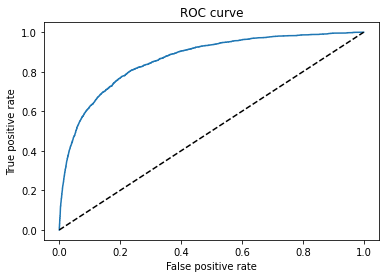

In [ ]:
#ROC_curve
plot_roc(y_valid, y_pred_proba)

In [ ]:
#AUC score
roc_auc_score(y_valid, y_pred_proba)

0.864291031663563

In [ ]:
#logistic regrssion with p-values function
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, max_iter=300)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
#logistic regression object
lr_p = LogisticRegression_with_p_values()

In [ ]:
lr_p.fit(X_train, y_train.ravel())

In [ ]:
#creating a dataframe with feature name, p_values and logistic regression coefficient
summary_table = pd.DataFrame(columns = ['Feature name'], data = woe_train_inputs.columns.values)
summary_table['Coefficients'] = np.transpose(lr_p.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_p.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = lr_p.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [ ]:
dummy_drop = list(woe_train_inputs.filter(regex='Depend').columns) + list(woe_train_inputs.filter(regex='age').columns) 

In [ ]:
woe_train_inputs_copy = woe_train_inputs.copy()
woe_test_inputs_copy = woe_test_inputs.copy()

In [ ]:
woe_train_inputs_copy.drop(dummy_drop, axis = 1, inplace = True)

In [ ]:
woe_test_inputs_copy.drop(dummy_drop, axis = 1, inplace = True)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(woe_train_inputs_copy.values, df_train_target.values,
                                                      test_size = 0.2, random_state = 42, stratify = df_train_target.values)

In [ ]:
lr_woe = LogisticRegression(max_iter=300, solver = 'liblinear')

In [ ]:
#fit logistic regression
lr_woe.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=300, solver='liblinear')

In [ ]:
#fit logistic regression
lr_woe.fit(X_train, y_train.ravel())
#predictions in probalities
y_pred_proba = lr_woe.predict_proba(X_valid)
y_pred_proba = y_pred_proba[: , 1]

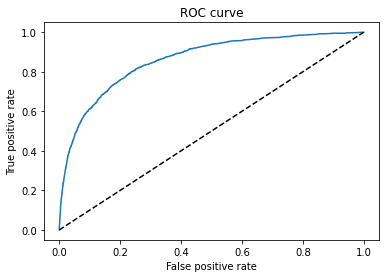

In [ ]:
plot_roc(y_valid, y_pred_proba)

In [ ]:
roc_auc_score(y_valid, y_pred_proba)

0.8607994926062232

In [ ]:
def rf_func(target, *data):
    precision = []
    recall = []
    f1_score_ = []
    auc_ = []
    for df in data:
        X_train, X_valid, y_train, y_valid = train_test_split(df.values, target.values,
                                                      test_size = 0.2, random_state = 42, stratify = target.values)
        
        rf = RandomForestClassifier(n_estimators=50)
        rf.fit(X_train, y_train.ravel())
        rf_pred = rf.predict(X_valid)
        rf_pred_proba = rf.predict_proba(X_valid)
        rf_pred_proba = rf_pred_proba[: , 1]
        precision.append(round(precision_score(y_valid, rf_pred, average=None)[1], 2))
        recall.append(round(recall_score(y_valid, rf_pred, average=None)[1], 2))
        f1_score_.append(round(f1_score(y_valid, rf_pred, average=None)[1], 2))
        auc_.append(round(roc_auc_score(y_valid, rf_pred_proba), 3))
    return pd.DataFrame([precision, recall, f1_score_, auc_], index = ['Precision', 'recall',
                                                                      'f1_score', 'auc'],
                       columns = ['Original Features', 'WOE_Features', 'WOE_Features_Trimmed'])

In [ ]:
df_ = rf_func(df_train_target, df_train_inputs, woe_train_inputs, woe_train_inputs_copy)
df_.T

,Precision,recall,f1_score,auc
Original Features,0.55,0.19,0.28,0.834
WOE_Features,0.43,0.16,0.23,0.805
WOE_Features_Trimmed,0.44,0.20,0.27,0.787


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV , StratifiedShuffleSplit

In [ ]:

# #Construct some pipelines

pipe_lr = Pipeline([('clf', LogisticRegression(random_state=42, max_iter=300))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(max_features = 'auto', random_state=0, n_estimators=50, n_jobs=-1))])

#Set grid search params

grid_params_lr = [{'clf__penalty': ['l1','l2'],
            'clf__C': [0.1, 0.2, 1, 2],
            'clf__solver': ['liblinear','lbfgs']}] 

grid_params_rf = [{'clf__min_samples_leaf': [2,5],
                'clf__max_depth': [5,10],
                'clf__min_samples_split': [3,5]}]

#Construct grid searches

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='roc_auc',
            cv = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state = 0), 
            n_jobs=-1)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='roc_auc',
            cv = StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state = 0),
            n_jobs=-1)


#List of pipelines for ease of iteration
grids = [gs_lr, gs_rf]

#Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest'}


#Fit the grid search objects
print('Performing model optimizations...')

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    if idx == 0:
        gs.fit(woe_train_inputs.values, df_train_target)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best Score
        print('Best AUC score: %.4f' % gs.best_score_)
    else:
        gs.fit(df_train_inputs.values, df_train_target)
        # Best params
        print('Best params: %s' % gs.best_params_)
        # Best Score
        print('Best AUC score: %.4f' % gs.best_score_)

Performing model optimizations...

Estimator: Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best AUC score: 0.8606

Estimator: Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 3}
Best AUC score: 0.8635


In [ ]:
#import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#loading best parameters
lr = LogisticRegression(C=0.1, max_iter=300, solver='liblinear', penalty='l2')
rf = RandomForestClassifier(n_estimators=50, random_state=10 , min_samples_leaf=5, max_depth=10,
                            min_samples_split=3, n_jobs=-1)

In [ ]:
#stratified kfold
scoring = 'roc_auc'
models = []
models.append(('LR', lr))
models.append(('RFG', rf))
names = []
results = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=3, shuffle=True , random_state = 47)
    if name == 'LR':
        cv_results = cross_val_score(model, woe_train_inputs.values, df_train_target.values, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, df_train_inputs.values, df_train_target.values, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR: 0.860854 (0.002020)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RFG: 0.863882 (0.002242)


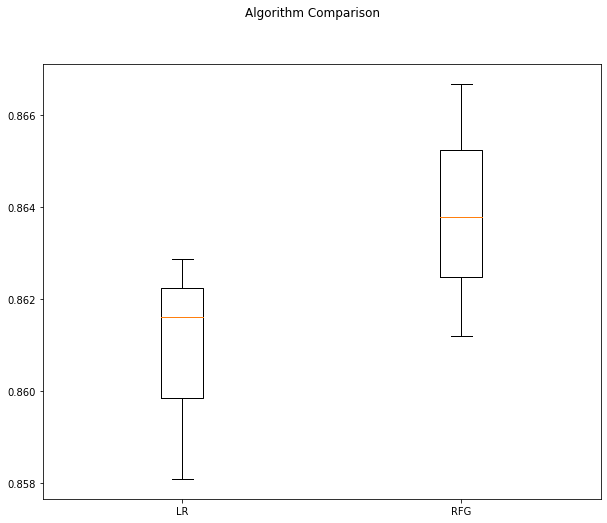

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
def trade_off(clf, train_input, target):
    X_train, X_valid, y_train, y_valid = train_test_split(train_input.values, target.values.ravel(),
                                                     test_size = 0.2, random_state = 42,
                                                      stratify = target.values.ravel())
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_valid)
    clf_pred_proba = clf.predict_proba(X_valid)
    clf_pred_proba = clf_pred_proba[:, 1]
    predictions = pd.concat([pd.DataFrame(clf_pred_proba), pd.DataFrame(clf_pred)],  axis = 1)
    predictions.columns = ['probability', 'class']
    precision_recall_df = pd.DataFrame({'precision':[0,0,0,0], 'recall':[0,0,0,0], 'f1_score':[0,0,0,0],
                                   'auc_score':[0,0,0,0]}, index = ['threshold:0.3', 'threshold:0.4',
                                                                   'threshold:0.5', 'threshold:0.6'])
    for threshold, idx in zip([0.3, 0.4, 0.5, 0.6], precision_recall_df.index.values):
        predictions['class_temp'] = np.where(predictions['probability'] > threshold, 1, 0)
        precision_recall_df.loc[idx, 'precision'] = round(precision_score(y_valid, predictions['class_temp'],
                                                                      average=None)[1], 2)
        precision_recall_df.loc[idx, 'recall'] = round(recall_score(y_valid, predictions['class_temp'],
                                                                average=None)[1], 2)
        precision_recall_df.loc[idx, 'f1_score'] = round(f1_score(y_valid, predictions['class_temp'],
                                                              average=None)[1], 2)
        precision_recall_df.loc[idx, 'auc_score'] = round(roc_auc_score(y_valid, predictions['probability']), 3)
    return precision_recall_df
    

In [ ]:
lr.fit(woe_train_inputs.values, df_train_target.values.ravel())
lr_pred = lr.predict(woe_test_inputs.values)
lr_pred_proba = lr.predict_proba(woe_test_inputs.values)
lr_pred_proba = lr_pred_proba[:, 1]

In [ ]:
rf.fit(df_train_inputs.values, df_train_target.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=50, n_jobs=-1, random_state=10)

In [ ]:
rf_pred = rf.predict(df_test_inputs.values)
rf_pred_proba = rf.predict_proba(df_test_inputs.values)
rf_pred_proba = rf_pred_proba[:, 1]

In [ ]:
rf_pred.shape

(150000,)

In [ ]:
rf_model = pd.DataFrame({'Id': df_test.index.values,
                                 'Probability': rf_pred_proba})
rf_model.set_index(keys = 'Id', inplace = True)

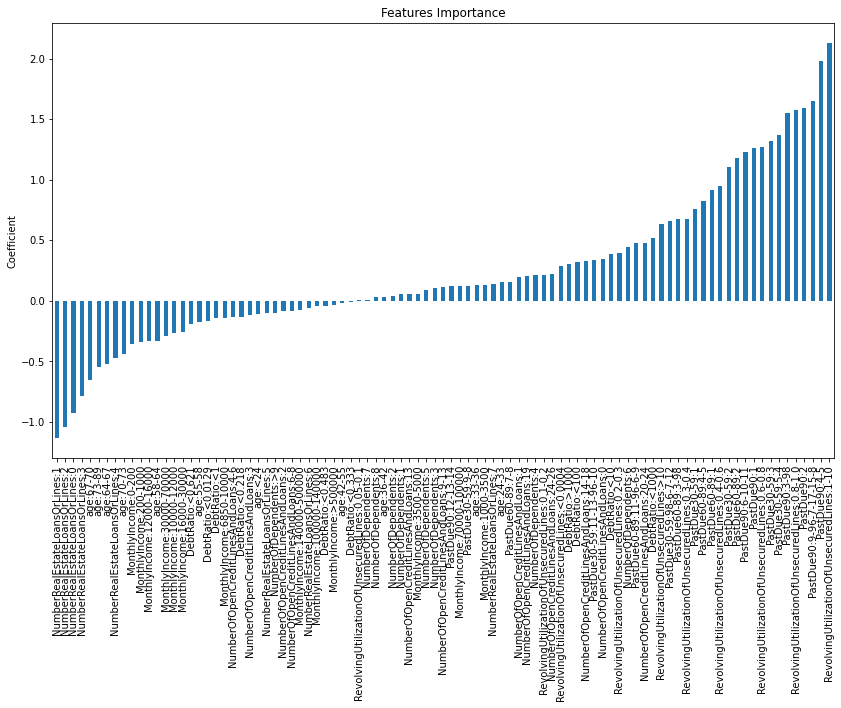

In [ ]:
importance = lr.coef_[0]
feat_importances = pd.DataFrame(importance, index=woe_train_inputs.columns.values, columns=['Score'])
feat_importances = feat_importances.sort_values(by='Score',ascending=True)
feat_importances.plot(kind='bar', title='Features Importance',legend=False, figsize=(14,8))
#plt.xlabel('Importance Score')
plt.ylabel('Coefficient')
plt.show()

In [ ]:
rf_model.to_csv('submission.csv')

# Our Implementation   



## SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model, df_train_inputs.values, feature_perturbation='interventional')
shap_values = explainer.shap_values(df_test_inputs.values)

100%|===================| 299864/300000 [27:32<00:00]       

In [ ]:
shap_values = np.asarray(shap_values)

In [ ]:
print(shap_values.shape)
print(df_test_inputs.shape)

(2, 150000, 10)
(150000, 10)


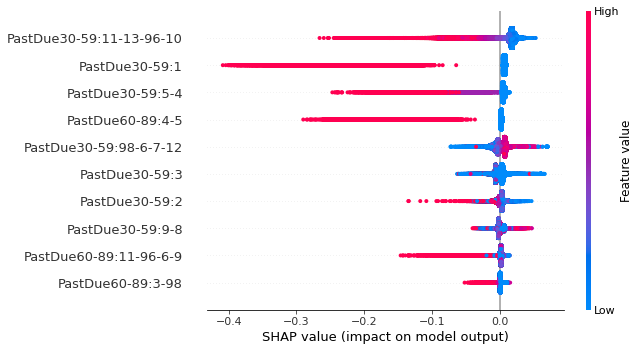

In [ ]:
shap.summary_plot(shap_values[0,:,:], df_test_inputs, feature_names=woe_train_inputs.columns)

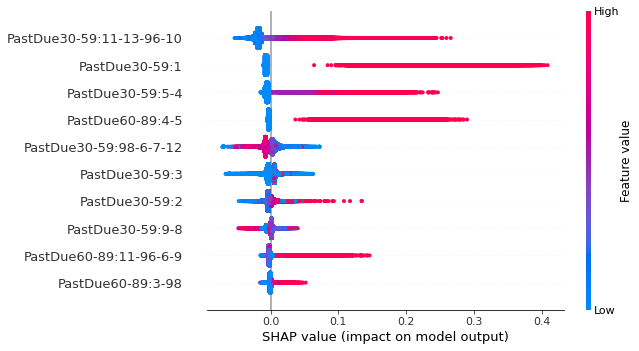

In [ ]:
shap.summary_plot(shap_values[1,:,:], df_test_inputs, feature_names=woe_train_inputs.columns)

## Statistical Parity and Disparate Impact w/ BinaryLabelDataset

In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import GermanDataset, StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.postprocessing import EqOddsPostprocessing

In [ ]:
# Create privileged and unprivileged - based priv and unpriv from younger than middle aged and then middle aged and above
conditions = [
              (df_train['age'] < 45),
              (df_train['age'] >= 45)
]
values = [0, 1]

df_train['age_category'] = np.select(conditions, values)
df_train = df_train.drop(['age'], axis=1)
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_category
0,1,0.766127,2,0.802982,9120.0,13,0,6,0,2.0,1
1,0,0.957151,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0,0.658180,1,0.085113,3042.0,2,1,0,0,0.0,0
3,0,0.233810,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0,0.907239,1,0.024926,63588.0,7,0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,0,0.225131,2100.0,4,0,1,0,0.0,1
149996,0,0.299745,0,0.716562,5584.0,4,0,1,0,2.0,0
149997,0,0.246044,0,3870.000000,0.0,18,0,1,0,0.0,1
149998,0,0.000000,0,0.000000,5716.0,4,0,0,0,0.0,0


In [ ]:
privileged_groups = ({'age' : 1})
unprivileged_groups = ({'age' : 0})

In [ ]:
orig_aif360 = StandardDataset(df_train[:30000],
                              label_name='SeriousDlqin2yrs',
                              protected_attribute_names=['age_category'], 
                              privileged_classes=[[1]], favorable_classes=[1])

In [ ]:
def fair_metrics(dataset, y_pred):
    dataset_pred = dataset.copy()
    dataset_pred.labels = y_pred

    attr = dataset_pred.protected_attribute_names[0]

    idx = dataset_pred.protected_attribute_names.index(attr)
    privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
    unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 

    classified_metric = ClassificationMetric(dataset, dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    result = {'statistical_parity_difference': metric_pred.statistical_parity_difference(),
             'disparate_impact': metric_pred.disparate_impact()}

    return result


# fair_metrics(orig_aif360, y_pred)

In [ ]:
subpop = np.arange(0, 150001, 30000)
subpop

array([     0,  30000,  60000,  90000, 120000, 150000])

In [ ]:
subpop = np.arange(0, 150001, 30000)
iter = np.arange(30000, 150001, 30000)
stat_parity = []
dis_impact = []
for x, y in zip(subpop, iter):
  orig_aif360 = StandardDataset(df_train[x:y],
                               label_name='SeriousDlqin2yrs',
                               protected_attribute_names=['age_category'], 
                               privileged_classes=[[1]], favorable_classes=[1])
  result = fair_metrics(orig_aif360, y_pred)
  stat_parity = np.append(stat_parity, result['statistical_parity_difference'])
  dis_impact = np.append(dis_impact, result['disparate_impact'])

In [ ]:
print('Statistical Parity: ', stat_parity.mean())
print('Disparate Impact: ', dis_impact.mean())

Statistical Parity:  4.7097065459703045e-06
Disparate Impact:  1.001058527563299


In [ ]:
print('Statistical Parity: ', stat_parity)

Statistical Parity:  [ 7.60615532e-06  6.26484269e-05  1.89448780e-03 -2.70147112e-04
 -1.67104674e-03]


In [ ]:
print("Disparate Impact: ", dis_impact)

Disparate Impact:  [1.00034473 1.00284164 1.08825299 0.98780521 0.92604806]


## Fairlearn

In [ ]:
!pip install --upgrade fairlearn==v0.6.0
!pip install --upgrade fairlearn==v0.6.0
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, false_negative_rate, false_positive_rate
import sklearn.metrics as skm
import functools
import numpy as np

In [ ]:
def insensitive_roc_auc(y_true, y_score):
    #to handle subgroups with only one class.
    if sum(y_true)!=len(y_true) and sum(y_true)!=0:
        return skm.roc_auc_score(y_true, y_score)
    else:
        return np.nan

def samplesize(y_true, y_score):
    return len(y_true)

#Metrics 
metric_fns = {'samplesize': samplesize, 
              'selection_rate': selection_rate,  # i.e., the percentage of the population which have ‘1’ as their label
              'FNR': false_negative_rate, 
              'FPR': false_positive_rate, 
              'accuracy': skm.accuracy_score,
              'average_precision': skm.average_precision_score,
              'roc_auc_score': insensitive_roc_auc 
              }

grouped_on_age = MetricFrame(metric_fns,
                             rf_pred, y_pred_tester,
                             sensitive_features=df_tester['age'])

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(rf_pred, y_pred_tester)

print(cf_matrix)

Found 86 subgroups. Evaluation may be slow
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in true_divide


[[139345   7817]
 [   629   2209]]


In [ ]:
assert grouped_on_age.overall['selection_rate'] == selection_rate(rf_pred, y_pred_tester)
assert grouped_on_age.overall['accuracy'] == skm.accuracy_score(rf_pred, y_pred_tester)
print(grouped_on_age.overall)

samplesize             150000
selection_rate        0.06684
FNR                  0.221635
FPR                  0.053118
accuracy             0.943693
average_precision    0.175688
roc_auc_score        0.862623
dtype: object


In [ ]:
grouped_on_age.by_group

,samplesize,selection_rate,FNR,FPR,accuracy,average_precision,roc_auc_score
age,,,,,,,
0,1,0.0,0.0,0.0,1.0,NaN,NaN
21,183,0.071038,1.0,0.071429,0.923497,0.005464,0.464286
22,434,0.082949,0.2,0.074592,0.923963,0.091193,0.862704
23,641,0.109204,0.0,0.097946,0.903276,0.114286,0.951027
24,816,0.120098,0.166667,0.10401,0.894608,0.131227,0.864662
...,...,...,...,...,...,...,...
102,3,0.0,0.0,0.0,1.0,NaN,NaN
103,3,0.0,0.0,0.0,1.0,NaN,NaN
105,1,0.0,0.0,0.0,1.0,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bf388150>,
      dtype=object)

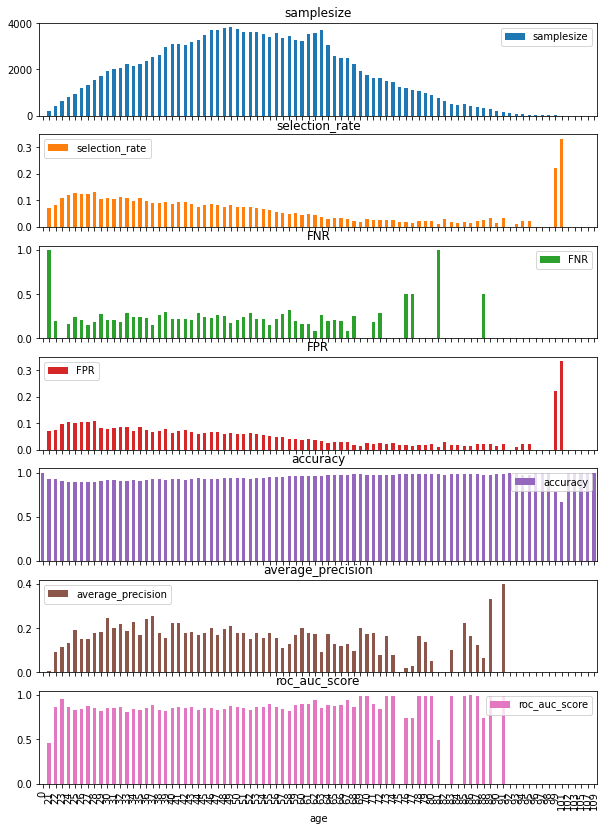

In [ ]:
grouped_on_age.by_group.plot.bar(subplots=True, figsize=(10, 14))

In [ ]:
grouped_on_age.group_min()

samplesize                  1
selection_rate            0.0
FNR                       0.0
FPR                       0.0
accuracy             0.666667
average_precision    0.001292
roc_auc_score        0.464286
dtype: object

In [ ]:
grouped_on_age.difference(method='between_groups')

samplesize               3836
selection_rate       0.333333
FNR                       1.0
FPR                  0.333333
accuracy             0.333333
average_precision    0.398708
roc_auc_score        0.529557
dtype: object

In [ ]:
grouped_on_age.difference(method='to_overall')

samplesize             149999
selection_rate       0.266493
FNR                  0.778365
FPR                  0.280215
accuracy             0.277027
average_precision    0.224312
roc_auc_score        0.398338
dtype: object

## LIME

In [ ]:
!pip install lime

In [ ]:
feature_names = df_train_inputs.columns
feature_names

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
data = df_train_inputs.iloc[:,:-1]
data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0.766127,45,2,0.802982,9120.0,13,0,6,0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0
...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0
149997,0.246044,58,0,3870.000000,0.0,18,0,1,0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0


In [ ]:
print(data.dtypes)
# Get a list of which variables are categorical
categorical_features  = [i for i in range(len(data.dtypes)) if data.dtypes[i]=='object']
print("Indices of categorical features: ", categorical_features)

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
dtype: object
Indices of categorical features:  []


In [ ]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import sklearn.ensemble
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    # Use label encoder to map categories to numbers
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(df_train_inputs.iloc[:, feature])
    # Replace the categories with corresponding numbers in the original data
    data.iloc[:, feature] = le.transform(data.iloc[:, feature])
    # Store and print the mappings for reference later
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")
categorical_names

{}

In [ ]:
labels = df_train_inputs.iloc[:,-1]
le= sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = df_train_inputs.iloc[:,:-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)

Class names:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 13. 20.]
Label mapping:  {0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 13.0: 11, 20.0: 12}


In [ ]:
import lime
import lime.lime_tabular
from lime import submodular_pick


explainer = lime.lime_tabular.LimeTabularExplainer(df_train_inputs.values, 
                                                   feature_names=feature_names,
                                                   class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names)

In [ ]:
predict_fn = lambda x: rf.predict_proba(encoder.transform(x)).astype(float)

In [ ]:
encoder = ColumnTransformer(transformers=[('get_dummies', OneHotEncoder(), categorical_features)], remainder='passthrough')
encoder = encoder.fit(df_test_inputs)
i = 100
exp = explainer.explain_instance((df_test_inputs.values[i]), predict_fn, num_features=9)

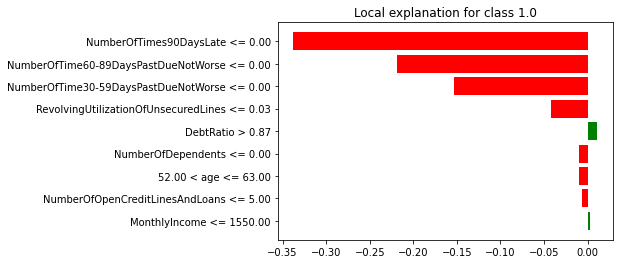

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()